2022 Oct 21h, Transformer refined code in progress. Need to save model config

2022 Sep 12th, testing DIY data normalization

2022 July 15th, Transformer can't use Weight_decay!

2022 July 14th, editted for Prelim model structure selection.

2022 July 1st, editted for Prelim Results plotting.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 219 kB/s 


In [3]:
!pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import heapq
import os
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
#from utils import progress_bar
from torch.autograd import Variable
import sys
from copy import deepcopy
import random
import collections
from scipy import signal
from drive.MyDrive.Wireless_Transformer.PSDshow import imshow
from drive.MyDrive.Wireless_Transformer.wrt import WrT # customized design of Wireless Transformer
from drive.MyDrive.Wireless_Transformer.wrt import WrTOct26 # new version WrT editting mean/class
from drive.MyDrive.Wireless_Transformer.AlexNet1D import AlexNet1D
# /content/drive/MyDrive/Wireless_Transformer/AlexNet1D.py
from torch.utils.data import Dataset, DataLoader
from pytz import timezone
TMZ = timezone('EST')
import datetime
import shutil
device = torch.device("cuda")
from torchsummary import summary 
from thop import profile
# torch.manual_seed(0)


Dataset description: cleanPSD64.pth, SNR-4dB, 10bands, 6PUs, 64pts/band.
2.1475989818573 1.7385141849517822
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_softmax() for <class 'torch.nn.modules.activation.Softmax'>.
macs are :
 49312.0
params are :
 6362.0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


model watermark 221128_15_39
Model saved to dir:
 /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_39/WrTOct26_SNR-4vol4000.pth
Epoch 1 :
Testing accuracy: 50.230079650878906 %; detection rate: 71.47578430175781; false alarm: 71.015625
Learning rate: 0.0005
Max accuracy: 50.230079889297485 %; training loss: , 205.16881480813026
Epoch 2 :
Testing accuracy: 85.57227325439453 %; detection rate: 84.89688110351562; false alarm: 13.752342224121094
Learning rate: 0.0004613404172952942
Max accuracy: 85.5722725391388 %; training loss: , 149.39289873838425
Epoch 3 :
Testing accuracy: 85.6421890258789 %; detection rate: 84.28594207763672; false alarm: 13.001556396484375
Learning rate: 0.0004256699612603923
Max accuracy: 85.64218878746033 %; training loss: , 147.33097705245018
Epoch 4 :
Testing accuracy: 85.71289825439453 %; detection rate: 85.1070327758789; false alarm: 13.681243896484375
Learning rate: 0.0003927575151158822
Max accuracy: 85.7128918170929 %; t

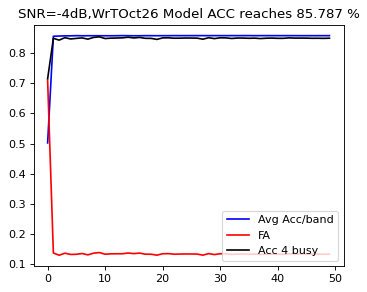

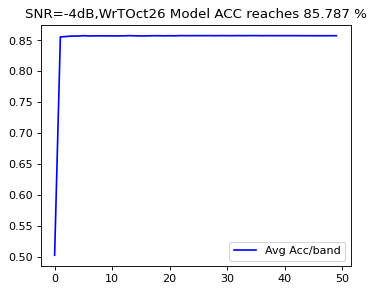

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_39/convergSNR-4.xlsx
Time spent for running50epochs 0:11:47.993035
Testing accuracy: 73.6089859008789 %; detection rate: 99.9585952758789; false alarm: 52.740623474121094
Testing accuracy: 73.66094207763672 %; detection rate: 99.95625305175781; false alarm: 52.63437271118164
Testing accuracy: 73.716796875 %; detection rate: 99.95625305175781; false alarm: 52.52265548706055
Testing accuracy: 73.7710952758789 %; detection rate: 99.95313262939453; false alarm: 52.41093444824219
Testing accuracy: 73.84219360351562 %; detection rate: 99.95000457763672; false alarm: 52.265621185302734
Testing accuracy: 73.91796875 %; detection rate: 99.9468765258789; false alarm: 52.11093521118164
Testing accuracy: 73.99297332763672 %; detection rate: 99.94532012939453; false alarm: 51.959373474121094
Testing accuracy: 74.072265625 %; detection rate: 99.94141387939453; false alarm: 51.796871185302734

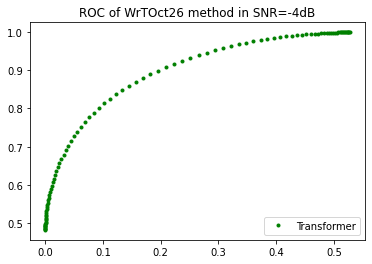

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_39/ROC_SNR-4.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_39/WrTOct26ROC.pth
Dataset description: cleanPSD64.pth, SNR-6dB, 10bands, 6PUs, 64pts/band.
3.2788193225860596 2.5341694355010986
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_softmax() for <class 'torch.nn.modules.activation.Softmax'>.
macs are :
 49312.0
params are :
 6362.0
model watermark 221128_15_54
Model saved to dir:
 /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_54/WrTOct26_SNR-6vol4000.pth
Epoch 1 :
Testing 

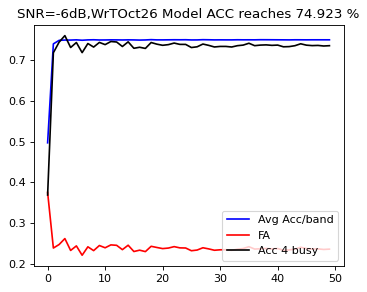

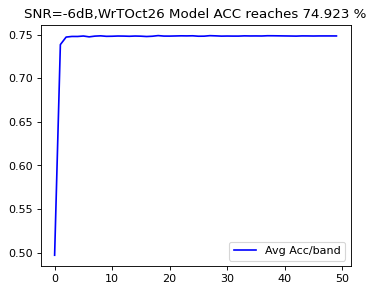

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_54/convergSNR-6.xlsx
Time spent for running50epochs 0:13:09.376596
Testing accuracy: 59.62812805175781 %; detection rate: 99.88282012939453; false alarm: 80.6265640258789
Testing accuracy: 59.888675689697266 %; detection rate: 99.86953735351562; false alarm: 80.0921859741211
Testing accuracy: 60.16523742675781 %; detection rate: 99.86172485351562; false alarm: 79.53125
Testing accuracy: 60.45195770263672 %; detection rate: 99.84844207763672; false alarm: 78.94453430175781
Testing accuracy: 60.741798400878906 %; detection rate: 99.83515930175781; false alarm: 78.3515625
Testing accuracy: 61.01250457763672 %; detection rate: 99.81328582763672; false alarm: 77.78828430175781
Testing accuracy: 61.33633041381836 %; detection rate: 99.78203582763672; false alarm: 77.109375
Testing accuracy: 61.63789367675781 %; detection rate: 99.76094055175781; false alarm: 76.48515319824219
Testing

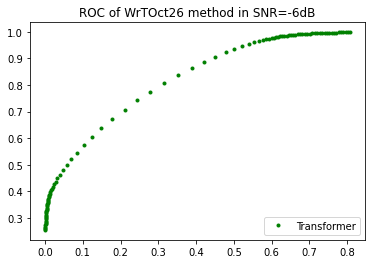

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_54/ROC_SNR-6.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_15_54/WrTOct26ROC.pth
Dataset description: cleanPSD64.pth, SNR-8dB, 10bands, 6PUs, 64pts/band.
5.105853080749512 3.881180763244629
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_softmax() for <class 'torch.nn.modules.activation.Softmax'>.
macs are :
 49312.0
params are :
 6362.0
model watermark 221128_16_12
Model saved to dir:
 /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_12/WrTOct26_SNR-8vol4000.pth
Epoch 1 :
Testing ac

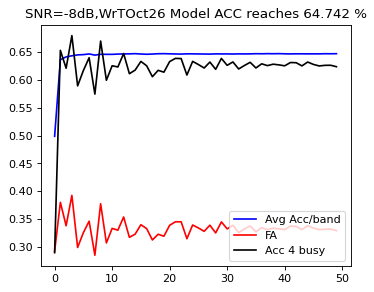

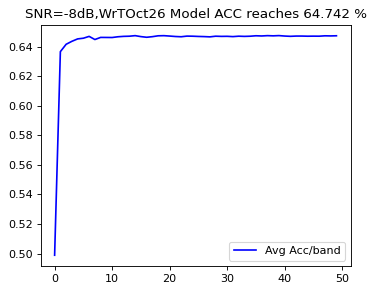

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_12/convergSNR-8.xlsx
Time spent for running50epochs 0:13:33.231927
Testing accuracy: 53.30156326293945 %; detection rate: 99.96094512939453; false alarm: 93.3578109741211
Testing accuracy: 53.355079650878906 %; detection rate: 99.9585952758789; false alarm: 93.2484359741211
Testing accuracy: 53.40742492675781 %; detection rate: 99.95625305175781; false alarm: 93.14140319824219
Testing accuracy: 53.456642150878906 %; detection rate: 99.9546890258789; false alarm: 93.0414047241211
Testing accuracy: 53.513675689697266 %; detection rate: 99.95313262939453; false alarm: 92.92578125
Testing accuracy: 53.56367492675781 %; detection rate: 99.9507827758789; false alarm: 92.82344055175781
Testing accuracy: 53.615238189697266 %; detection rate: 99.94922637939453; false alarm: 92.71875
Testing accuracy: 53.66484451293945 %; detection rate: 99.94766235351562; false alarm: 92.61796569824219


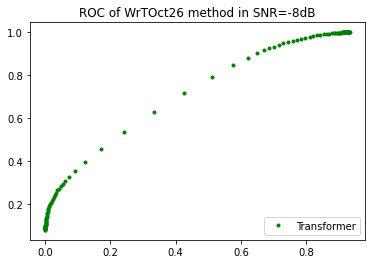

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_12/ROC_SNR-8.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_12/WrTOct26ROC.pth
Dataset description: cleanPSD64.pth, SNR-10dB, 10bands, 6PUs, 64pts/band.
8.027788162231445 6.0735697746276855
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_softmax() for <class 'torch.nn.modules.activation.Softmax'>.
macs are :
 49312.0
params are :
 6362.0
model watermark 221128_16_30
Model saved to dir:
 /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_30/WrTOct26_SNR-10vol4000.pth
Epoch 1 :
Testing

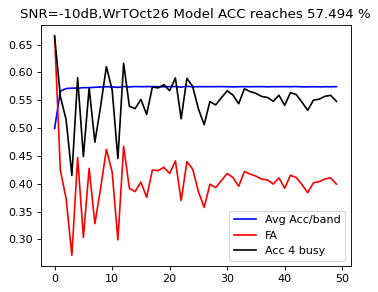

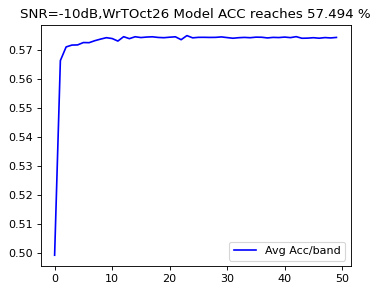

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_30/convergSNR-10.xlsx
Time spent for running50epochs 0:13:47.997933
Testing accuracy: 50.00039291381836 %; detection rate: 100.00000762939453; false alarm: 99.99922180175781
Testing accuracy: 50.00234603881836 %; detection rate: 100.00000762939453; false alarm: 99.99531555175781
Testing accuracy: 50.00312805175781 %; detection rate: 100.00000762939453; false alarm: 99.9937515258789
Testing accuracy: 50.009376525878906 %; detection rate: 100.00000762939453; false alarm: 99.98124694824219
Testing accuracy: 50.017189025878906 %; detection rate: 100.00000762939453; false alarm: 99.96562194824219
Testing accuracy: 50.035160064697266 %; detection rate: 99.99844360351562; false alarm: 99.9281234741211
Testing accuracy: 50.062110900878906 %; detection rate: 99.99531555175781; false alarm: 99.87109375
Testing accuracy: 50.095706939697266 %; detection rate: 99.99219512939453; false alarm

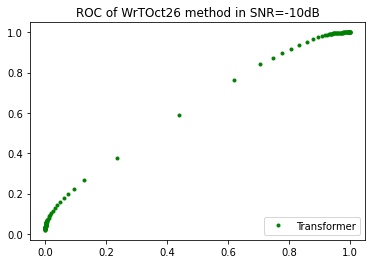

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_30/ROC_SNR-10.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_30/WrTOct26ROC.pth
Dataset description: cleanPSD64.pth, SNR-2dB, 10bands, 6PUs, 64pts/band.
1.4586796760559082 1.3074707984924316
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_softmax() for <class 'torch.nn.modules.activation.Softmax'>.
macs are :
 49312.0
params are :
 6362.0
model watermark 221128_16_49
Model saved to dir:
 /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_49/WrTOct26_SNR-2vol4000.pth
Epoch 1 :
Testing

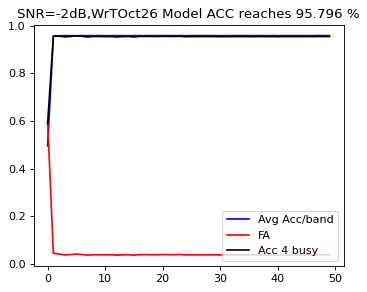

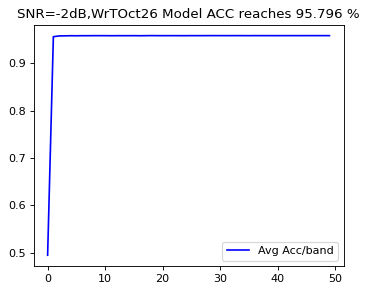

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_49/convergSNR-2.xlsx
Time spent for running50epochs 0:14:09.668132
Testing accuracy: 86.13750457763672 %; detection rate: 99.84687805175781; false alarm: 27.571868896484375
Testing accuracy: 86.42813110351562 %; detection rate: 99.83594512939453; false alarm: 26.97968292236328
Testing accuracy: 86.73281860351562 %; detection rate: 99.82032012939453; false alarm: 26.35468292236328
Testing accuracy: 87.02188110351562 %; detection rate: 99.80078887939453; false alarm: 25.75702667236328
Testing accuracy: 87.33047485351562 %; detection rate: 99.7828140258789; false alarm: 25.121871948242188
Testing accuracy: 87.6265640258789 %; detection rate: 99.76953887939453; false alarm: 24.516403198242188
Testing accuracy: 87.9273452758789 %; detection rate: 99.74531555175781; false alarm: 23.890625
Testing accuracy: 88.22891235351562 %; detection rate: 99.73125457763672; false alarm: 23.273437

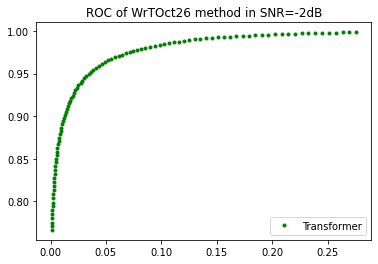

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_49/ROC_SNR-2.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_16_49/WrTOct26ROC.pth
Dataset description: cleanPSD64.pth, SNR0dB, 10bands, 6PUs, 64pts/band.
1.0512362718582153 1.1046969890594482
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_softmax() for <class 'torch.nn.modules.activation.Softmax'>.
macs are :
 49312.0
params are :
 6362.0
model watermark 221128_17_08
Model saved to dir:
 /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/WrTOct26_SNR0vol4000.pth
Epoch 1 :
Testing ac

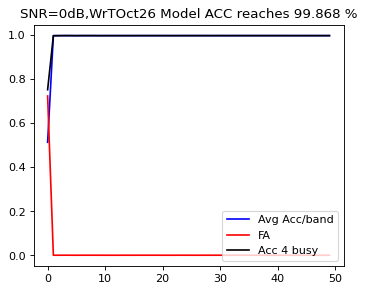

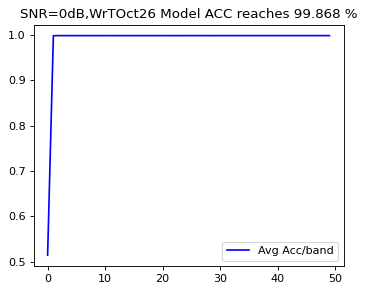

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/convergSNR0.xlsx
Time spent for running50epochs 0:14:32.529443
Testing accuracy: 99.53945922851562 %; detection rate: 99.98359680175781; false alarm: 0.9046859741210938
Testing accuracy: 99.55586242675781 %; detection rate: 99.98281860351562; false alarm: 0.8710861206054688
Testing accuracy: 99.56680297851562 %; detection rate: 99.98281860351562; false alarm: 0.849212646484375
Testing accuracy: 99.58086395263672 %; detection rate: 99.98281860351562; false alarm: 0.8210906982421875
Testing accuracy: 99.5914077758789 %; detection rate: 99.9820327758789; false alarm: 0.7992172241210938
Testing accuracy: 99.6070327758789 %; detection rate: 99.9820327758789; false alarm: 0.7679672241210938
Testing accuracy: 99.61758422851562 %; detection rate: 99.97969055175781; false alarm: 0.7445297241210938
Testing accuracy: 99.6246109008789 %; detection rate: 99.97891235351562; false alarm: 0

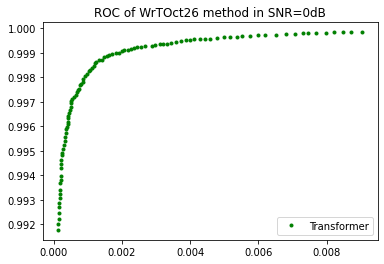

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/ROC_SNR0.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/WrTOct26ROC.pth


In [5]:
class ToyDatasetMaker(Dataset):
    "Toy version that wrap data/label tensor list into pytorch dataset"
    def __init__(self, data_list, label_list, transformFunc=transforms.Compose([ ]), norm_config=(1,1) ):
        """
        db: a list of input signal tensors, 
        label_list: a list of data labels, align with elements in db.
        """
        self.datasets = data_list
        self.label_list = label_list
        self.transformFunc = transformFunc
        self.norm_config = norm_config
    def __getitem__(self, i):
        img = self.datasets[i]
        img = self.transformFunc(img)
        img = (img-self.norm_config[0])/self.norm_config[1] # added for normalizing non-image
        class_label = self.label_list[i]
        return img, class_label

    def __len__(self):
        return len(self.label_list)

def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    epoch_inter = 20
#     print("Decrease learning rate every %d epoch by %2f" %(epoch_inter, des))
    #lr = 0.01 * (des ** (epoch // epoch_inter))
    bs = 0.2 #0.2
    lr = 0.0005 * bs ** (epoch/epoch_inter)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train(model, trainloader, epoch):
  #Transformer fail with weight_decay
  optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.000 )
  # optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0 )
  adjust_learning_rate(optimizer, epoch)
  running_loss = 0.0
  model.train()
  for i, data in enumerate(trainloader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data
      #inputs = inputs.to(device)
      # if type(model).__name__ == 'WrT':
      inputs = Variable(inputs.view(-1, 1,1,datas_tr[0].size(0)).to(device)) #640
      # inputs = Variable(inputs.view(-1,datas_tr[0].size(0)).to(device))
      labels = Variable(labels.to(device))
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      # print statistics
      running_loss += loss.item()
  print('Learning rate:', optimizer.param_groups[0]['lr'])
  return model, running_loss

def test(model, testloader, thresh = 0):
  total = 0 #sum of occupation and emptiness
  total_ocp = 0 #occupied bands
  total_emp = 0 #empty bands
  correct = 0
  correct_ocp = 0
  correct_emp = 0
  model.eval()
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          inputs, labels = data
          inputs = Variable(inputs.view(-1,1,1,datas_tr[0].size(0) ).to(device)) #10bands=>640, 8bands=>512
          labels = Variable(labels.to(device)) 
          total_batch = float( torch.tensor(labels.size()).prod() ) 
          total += total_batch
          total_ocp += float(labels.sum())  #occupied bands
          total_emp += float(total_batch - labels.sum())  #empty bands
          # calculate outputs by running images through the network
          outputs = ( model(inputs)> thresh ).bool()
          labels = labels.bool()
          # the class with the highest energy is what we choose as prediction
          correct_ocp += (outputs * labels).sum() 
          correct_emp += (~outputs * ~labels).sum()
          correct = correct_ocp + correct_emp
          if (outputs * labels).sum()+(~outputs * ~labels).sum() != (~(outputs^labels)) .sum():
            print('wrong!', (outputs * labels).sum()+(~outputs * ~labels).sum(),'!=', (~(outputs^labels)).sum())

  # print(f'Accuracy of the network on the test data: {100 * correct/total} %')
  print(f'Testing accuracy: {100 * correct/total} %; detection rate: {100*correct_ocp/total_ocp}; false alarm: {100-100*correct_emp/total_emp}')
  return (correct/total, correct_ocp/total_ocp, correct_emp/total_emp) 

def setDir(filepath):
  # if directory not exist, create. if directory already exist, empty it.
  if not os.path.exists(filepath):
    os.makedirs(filepath)
  else:
    print('Directory already exists')
    shutil.rmtree(filepath, ignore_errors = True)
    os.mkdir(filepath)        

for SNR in [-4, -6, -8, -10, -2, 0]: #[-1, -3]: #[400,200,100]:
  volum = 4000 # 4000 samples per occupancy pattern
  # address1 =  '/content/drive/MyDrive/Wireless_Transformer/MesBondSW/' #WFSC/, SFWC/, AllW/
  address1 =  '/content/drive/MyDrive/Wireless_Transformer/LeftRightIndep/' #LeftRightIndep version
  # name1 = 'T_8b3P1sig_SNR'+str(SNR)+'.pth' #data of PU with the same sig
  name1 = 'T_10b5P5sig_SNR'+str(SNR)+'vol'+str(volum)+'.pth' #10bands, 5PUs, 5 kinds of sig, training & testing together
  # name1 = 'Old_Data/T_8b5P_SNR-10.pth' # 10bands failed, test on 8bands. reason found: shouldn't use weight decay for WrT 
  # name1 = 'Old_Data/T_8b3P3sig_SNR'+str(SNR)+'.pth' #8 band data with PU have the same sig
  # data_dict = torch.load(address1 + name1)
  #==================================Data_path_override======================================
  # data_dict = torch.load( '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221024_13_53/221024_13_53Data_SNR-5vol4000.pth')
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221027_21_14/221027_21_14Data_SNR-5vol4000.pth'
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221030_17_33/221030_17_33Data_SNR-5vol4000.pth'
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221030_21_21/221030_21_21Data_SNR'+str(SNR)+'vol4000.pth'
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/unbonded/221116_19_42/221116_19_42Data_SNR'+str(SNR)+'vol'+str(volum)+'.pth'
  datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/noleakage/221128_14_59/221128_14_59Data_SNR'+str(SNR)+'vol'+str(volum)+'.pth'

  data_dict = torch.load(datadir)  
  datas_te = data_dict['testing data list']
  labels_te = data_dict['testing label list']
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/varyingsize/221117_21_33/221117_21_33Data_SNR-6vol'+str(volum)+'.pth'
  # data_dict1 = torch.load( datadir)
  print( 'Dataset description:', data_dict['Description'] )
  datas_tr = data_dict['training data list']
  labels_tr = data_dict['training label list']

  num_bands = labels_te[0] 

  #calculating mean and std
  datas_all = datas_tr+datas_te
  data_tens =torch.cat(datas_all,dim=0)
  (data_mean, data_std) = ( torch.mean(data_tens).item(), torch.std(data_tens).item() )
  print(data_mean, data_std)

  trainset= ToyDatasetMaker(datas_tr, labels_tr, norm_config=(data_mean, data_std) )
  testset= ToyDatasetMaker(datas_te, labels_te, norm_config=(data_mean, data_std) )
  train_loader = DataLoader(trainset, batch_size=500, shuffle=True, num_workers=12, pin_memory=True)
  test_loader = DataLoader(testset, batch_size=1000, shuffle=False, num_workers=12, pin_memory=True)

  # WrT_var={
  #     'spectra_size': (1, datas_tr[0].size(0)),
  #     'patch_size': (1,320),
  #     'num_bands': labels_te[0].size(0),
  #     'dim': 64,
  #     'depth': 3,
  #     'heads': 4,
  #     'mlp_dim': 128,
  #     'dropout': .1,
  #     'dim_head': 16,
  #     'emb_dropout': .1,
  #     'pool': 'mean',
  #     'Description': 'None',
  #     'Data_dir': datadir,
  # }


  WrT_var={ #
  'spectra_size': (1,datas_tr[0].size(0)),'patch_size':(1,64),'num_bands':labels_te[0].size(0),'dim':8,
  'depth':1,'heads':8,'mlp_dim':16,'dropout':.1,'dim_head':8,'emb_dropout':.1,'pool':'mean','Description':'None', 'Data_dir': datadir,} 
  #;

  WrT_var={ #
  'spectra_size': (1,datas_tr[0].size(0)),'patch_size':(1,64),'num_bands':labels_te[0].size(0),'dim':2,
  'depth':1,'heads':1,'mlp_dim':2,'dropout':.1,'dim_head':2,'emb_dropout':.1,'pool':'mean','Description':'None', 'Data_dir': datadir,} 
  #;

  WrT_var={ #
  'spectra_size': (1,datas_tr[0].size(0)),'patch_size':(1,64),'num_bands':labels_te[0].size(0),'dim':16,
  'depth':1,'heads':4,'mlp_dim':32,'dropout':.1,'dim_head':8,'emb_dropout':.1,'pool':'mean','Description':'None', 'Data_dir': datadir,} 
  #;

  # WrT_var={ #1114
  # 'spectra_size': (1,datas_tr[0].size(0)),'patch_size':(1,64),'num_bands':labels_te[0].size(0),'dim':4,
  # 'depth':1,'heads':4,'mlp_dim':4,'dropout':.1,'dim_head':4,'emb_dropout':.1,'pool':'mean','Description':'None', 'Data_dir': datadir,} 
  # #;

  # from IPython.core.interactiveshell import ensure_dir_exists
  v = WrTOct26(
      spectra_size = WrT_var['spectra_size'],
      patch_size = WrT_var['patch_size'],
      num_bands = WrT_var['num_bands'],
      dim = WrT_var['dim'], # 512
      depth = WrT_var['depth'], #6
      heads = WrT_var['heads'], #8
      mlp_dim = WrT_var['mlp_dim'], #1024
      dropout = WrT_var['dropout'],
      dim_head = WrT_var['dim_head'],
      emb_dropout = WrT_var['emb_dropout'],
      pool = WrT_var['pool'],
  )

  # for i, data in enumerate(train_loader, 0):
  #   if i>0:
  #     break
  #   inputs, labels = data
  #   inputs = Variable(inputs.view(-1, 1,1,datas_tr[0].size(0)).to(device))
  #   v(inputs)

  criterion = nn.BCEWithLogitsLoss()
  # summary(v, (1,1,640))

  macs, params = profile(v, inputs =(torch.randn(1, 1, 1, 640), )) #model on CPU
  print('macs are :\n',macs)
  print('params are :\n',params)
  v = v.to(device)

  nepoch = 50
  acc_list = []
  acc_ocp_list = []
  fa_list = []
  # plt.title("Global Model ACC of the proposed method")
  max_acc = 0
  now=datetime.datetime.now(TMZ) #time watermark
  time_watermark = now.strftime('%y%m%d_%H_%M')
  print('model watermark',time_watermark)
  address_model = '/content/drive/MyDrive/Wireless_Transformer/Saved_Models/'+type(v).__name__+'/noleakage/'+time_watermark+'/' #root dir for saved models
  #child dir nbamed by time_watermark
  setDir(address_model) # if dir not exist, create. if dir already exist, empty it.
  name1 = type(v).__name__ +'_SNR'+str(SNR)+'vol'+str(volum)+'.pth'
  print('Model saved to dir:\n', address_model+name1)
  torch.save(WrT_var, address_model+type(v).__name__+'config.pth') #Save WrT model config
  txt=open(address_model+'Datasetdir.txt',"w").write(datadir+' very small model To find Gap')#save dataset dir (dataset version)
  
  for i in range(nepoch):
    print('Epoch', i+1,':')      
    acc_ = test(v, test_loader)
    
    if acc_[0].cpu().item() > max_acc:
      max_acc = acc_[0].cpu().item()
      torch.save(v.state_dict(), address_model+name1)

    acc_list.append( acc_[0].cpu().item())
    acc_ocp_list.append(acc_[1].cpu().item())
    fa_list.append((1-acc_[2]).cpu().item())  

    #uniform the y axis, label SNR on title
    v, training_loss = train(v, train_loader, epoch=i)# Test first and train then version
    print(f'Max accuracy: {100 * max_acc} %; training loss: , {training_loss}')

  plt.figure(1,figsize=(5, 4), dpi=80) 
  l1, = plt.plot( acc_list, color='blue',label='Avg Acc/band')
  l2, = plt.plot( fa_list, color='red', label='FA')
  l3, = plt.plot( acc_ocp_list, color='black', label='Acc 4 busy')
  plt.legend(loc='lower right')
  plt.title('SNR='+str(SNR)+'dB,'+ type(v).__name__+ ' Model ACC reaches %.3f %%' %  (100*max(acc_list))  )
  plt.show()

  plt.figure(2,figsize=(5, 4), dpi=80)
  l1, = plt.plot( acc_list, color='blue',label='Avg Acc/band')
  # l2, = plt.plot( fa_list, color='red', label='FA')
  # l3, = plt.plot( acc_ocp_list, color='black', label='Acc 4 busy')
  plt.legend(loc='lower right')
  plt.title('SNR='+str(SNR)+'dB,'+ type(v).__name__+ ' Model ACC reaches %.3f %%' %  (100*max(acc_list))  )
  plt.show()

  df1 = pd.DataFrame() # save statics to excel
  # df1['acc_old'] = xx
  df1['Accuracy'] = acc_list
  df1['FA'] = fa_list
  df1['PD'] = acc_ocp_list 

  with pd.ExcelWriter(address_model + "converg"+"SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
    df1.to_excel(writer, sheet_name=type(v).__name__)
  print('Statics saved to excel:', address_model + "converg"+"SNR"+str(SNR)+".xlsx")

  finish_tim=datetime.datetime.now(TMZ)
  print('Time spent for running'+str(nepoch)+'epochs',finish_tim - now)

  '''ROC module of current model'''
  pd3= []
  pfa3 = []
  v.load_state_dict(torch.load(address_model+name1))

  for thresh_val in [ (i-50)/12.5 for i in range(100)]: 
    #[i*0.9999/100 for i in list(range(1,100))]
    # in [(1-i/50)*5e-8+1e-10 for i in list(range(50))]
      CNNoutput = test(v, test_loader, thresh=thresh_val) #
      #testnets( net_list, class_dir, tol_test_loader, thresh_sig = thresh_val )
      pd3.append(CNNoutput[1].to(torch.device('cpu')).item())
      pfa3.append(1-CNNoutput[2].to(torch.device('cpu')).item())

  plt.title("ROC of " +type(v).__name__+ " method in SNR="+str(SNR)+"dB")
  l3, = plt.plot(pfa3, pd3, '.', color='green', label='Transformer')
  plt.legend(loc='lower right')
  plt.show()

  dfroc = pd.DataFrame() # save statics to excel
  # df1['acc_old'] = xx
  dfroc['PD'] = pd3
  dfroc['PFA'] = pfa3


  with pd.ExcelWriter(address_model + "ROC_SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
    dfroc.to_excel(writer, sheet_name=type(v).__name__)
  print('Statics saved to excel:', address_model + "ROC_SNR"+str(SNR)+".xlsx")

  ROC_dict = {
      'pd':pd3,
      'pfa':pfa3,
  }
  torch.save(ROC_dict, address_model+type(v).__name__+'ROC.pth')
  print('ROC in Lists saved to:', address_model+type(v).__name__+'ROC.pth')



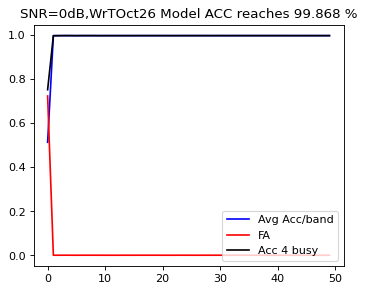

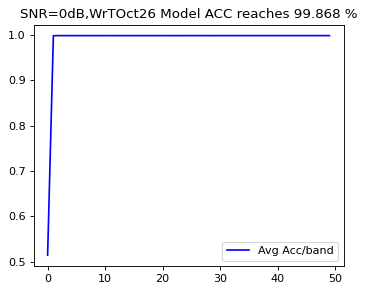

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/convergSNR0.xlsx
Time spent for running50epochs 0:19:39.326383
Testing accuracy: 99.53945922851562 %; detection rate: 99.98359680175781; false alarm: 0.9046859741210938
Testing accuracy: 99.55586242675781 %; detection rate: 99.98281860351562; false alarm: 0.8710861206054688
Testing accuracy: 99.56680297851562 %; detection rate: 99.98281860351562; false alarm: 0.849212646484375
Testing accuracy: 99.58086395263672 %; detection rate: 99.98281860351562; false alarm: 0.8210906982421875
Testing accuracy: 99.5914077758789 %; detection rate: 99.9820327758789; false alarm: 0.7992172241210938
Testing accuracy: 99.6070327758789 %; detection rate: 99.9820327758789; false alarm: 0.7679672241210938
Testing accuracy: 99.61758422851562 %; detection rate: 99.97969055175781; false alarm: 0.7445297241210938
Testing accuracy: 99.6246109008789 %; detection rate: 99.97891235351562; false alarm: 0

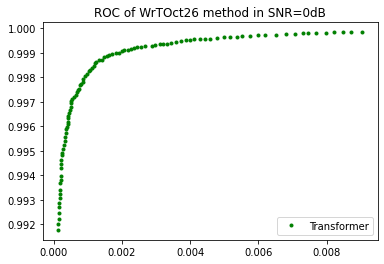

Statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/ROC_SNR0.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/noleakage/221128_17_08/WrTOct26ROC.pth


In [6]:
#If training stop half way, use this cell to plot converg and calculate ROC
plt.figure(1,figsize=(5, 4), dpi=80) 
l1, = plt.plot( acc_list, color='blue',label='Avg Acc/band')
l2, = plt.plot( fa_list, color='red', label='FA')
l3, = plt.plot( acc_ocp_list, color='black', label='Acc 4 busy')
plt.legend(loc='lower right')
plt.title('SNR='+str(SNR)+'dB,'+ type(v).__name__+ ' Model ACC reaches %.3f %%' %  (100*max(acc_list))  )
plt.show()

plt.figure(2,figsize=(5, 4), dpi=80)
l1, = plt.plot( acc_list, color='blue',label='Avg Acc/band')
# l2, = plt.plot( fa_list, color='red', label='FA')
# l3, = plt.plot( acc_ocp_list, color='black', label='Acc 4 busy')
plt.legend(loc='lower right')
plt.title('SNR='+str(SNR)+'dB,'+ type(v).__name__+ ' Model ACC reaches %.3f %%' %  (100*max(acc_list))  )
plt.show()

df1 = pd.DataFrame() # save statics to excel
# df1['acc_old'] = xx
df1['Accuracy'] = acc_list
df1['FA'] = fa_list
df1['PD'] = acc_ocp_list 

with pd.ExcelWriter(address_model + "converg"+"SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
  df1.to_excel(writer, sheet_name=type(v).__name__)
print('Statics saved to excel:', address_model + "converg"+"SNR"+str(SNR)+".xlsx")

finish_tim=datetime.datetime.now(TMZ)
print('Time spent for running'+str(nepoch)+'epochs',finish_tim - now)

'''ROC module of current model'''
pd3= []
pfa3 = []
v.load_state_dict(torch.load(address_model+name1))

for thresh_val in [ (i-50)/12.5 for i in range(100)]: 
  #[i*0.9999/100 for i in list(range(1,100))]
  # in [(1-i/50)*5e-8+1e-10 for i in list(range(50))]
    CNNoutput = test(v, test_loader, thresh=thresh_val) #
    #testnets( net_list, class_dir, tol_test_loader, thresh_sig = thresh_val )
    pd3.append(CNNoutput[1].to(torch.device('cpu')).item())
    pfa3.append(1-CNNoutput[2].to(torch.device('cpu')).item())

plt.title("ROC of " +type(v).__name__+ " method in SNR="+str(SNR)+"dB")
l3, = plt.plot(pfa3, pd3, '.', color='green', label='Transformer')
plt.legend(loc='lower right')
plt.show()

dfroc = pd.DataFrame() # save statics to excel
# df1['acc_old'] = xx
dfroc['PD'] = pd3
dfroc['PFA'] = pfa3


with pd.ExcelWriter(address_model + "ROC_SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
  dfroc.to_excel(writer, sheet_name=type(v).__name__)
print('Statics saved to excel:', address_model + "ROC_SNR"+str(SNR)+".xlsx")

ROC_dict = {
    'pd':pd3,
    'pfa':pfa3,
}
torch.save(ROC_dict, address_model+type(v).__name__+'ROC.pth')
print('ROC in Lists saved to:', address_model+type(v).__name__+'ROC.pth')

In [7]:
from google.colab import runtime
runtime.unassign()

In [8]:

# v = WrT(
#     spectra_size = WrT_var['spectra_size'],
#     patch_size = WrT_var['patch_size'],
#     num_bands = WrT_var['num_bands'],
#     dim = WrT_var['dim'], # 512
#     depth = WrT_var['depth'], #6
#     heads = WrT_var['heads'], #8
#     mlp_dim = WrT_var['mlp_dim'], #1024
#     dropout = WrT_var['dropout'],
#     dim_head = WrT_var['dim_head'],
#     emb_dropout = WrT_var['emb_dropout'],
#     pool = WrT_var['pool'],
# ).to(device)

# #not good with depth: 3 heads 4 dim 64 mlpdim 128
# criterion = nn.BCEWithLogitsLoss()

# # v = AlexNet1D(num_classes = 10).to(device)
# summary(v, (1,1,640))

In [9]:
# #long word 320
# v = WrT(
#     spectra_size = (1, datas_tr[0].size(0)),
#     patch_size = (1,320),
#     num_bands = labels_te[0].size(0),
#     dim = 64, # 512
#     depth = 3, #6
#     heads = 4, #8
#     mlp_dim = 128, #1024
#     dropout = 0.1,
#     dim_head = 16,
#     emb_dropout = 0.1,
#     pool = 'mean'
# ).to(device)

# #not good with depth: 3 heads 4 dim 64 mlpdim 128
# criterion = nn.BCEWithLogitsLoss()

In [10]:
# #short word 64
# v = WrT(
#     spectra_size = (1, datas_tr[0].size(0)),
#     patch_size = (1,64),
#     num_bands = labels_te[0].size(0),
#     dim = 8, # 512
#     depth = 1, #6
#     heads = 1, #8
#     mlp_dim = 16, #1024
#     dropout = 0.1,
#     dim_head = 8,
#     emb_dropout = 0.1,
#     pool = 'mean'
# ).to(device)

# #not good with depth: 3 heads 4 dim 64 mlpdim 128
# criterion = nn.BCEWithLogitsLoss()

In [ ]:
# finish_tim=datetime.datetime.now(TMZ)
# print('Time spent for running'+str(nepoch)+'epochs',finish_tim - now)

In [ ]:
# plt.title("ROC of " +type(v).__name__+ " method in SNR="+str(SNR)+"dB")
# l3, = plt.plot(pfa3, pd3, color='green', label='Transformer')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:

# ROC_dict=torch.load('')  #load another result for reference
# plt.title("ROC of several methods at SNR="+str(SNR)+'dB')
# # l1, = plt.plot(pfa, pd, color='blue',label='EnergyDetection1')
# l2, = plt.plot(ROC_dict['pfa'], ROC_dict['pd'], color='red', label='Transformer')
# l3, = plt.plot(pfa3, pd3, color='green', label='Transformer')
# plt.legend(loc='lower right')
# plt.show()
